In [1]:
from stock import* 
import numpy as np
import akshare as ak
import pandas as pd

In [2]:
import numpy as np
stock_list=["sh600519","sh603517","sh600031",
            "sz000858","sh603816","sh600690",
            "sh600519","sz002493","sh601318",
            "sz000895","sz002415","sh601021",
            "sz000333","sz300413","sz002332"]
stock_list2=list(stock_zh_a_spot_df['代码'][0:50])
day=70
time = 30
ExpReturn=[]
ExpCov=[]
stock_in_plan=[]
for s in stock_list:
    data = ak.stock_zh_a_daily(symbol=s, adjust="qfq")
    if len(data)>900: # 考察历史900天的数据
        stock_in_plan.append(s)
        k=stock(data,s,day)
        ExpReturn.append(k.ExpReturn2())
        ExpCov.append(k.His_Return2())
ExpReturn=np.array(ExpReturn)*time
ExpCov=np.array(ExpCov)
ExpCov=np.cov(ExpCov)*time
ExpCov

array([[ 7.05470328e-04,  3.57526500e-04,  3.54820046e-04,
         7.29593181e-04,  3.80467053e-04,  6.13420593e-05,
         7.05470328e-04,  2.93571892e-04,  3.25316834e-04,
         1.43452568e-04,  1.10401202e-04,  2.68527235e-04,
         1.73970954e-04,  2.42227845e-04,  2.66132166e-04],
       [ 3.57526500e-04,  1.27204959e-03,  2.94838160e-04,
         4.97015834e-04,  4.33226486e-04,  6.21921486e-05,
         3.57526500e-04,  2.75546725e-04,  1.17293178e-04,
         1.42314509e-04,  1.10503778e-04,  2.40668809e-04,
         1.49004185e-04,  1.97794568e-04,  4.05952834e-04],
       [ 3.54820046e-04,  2.94838160e-04,  1.03226007e-03,
         4.68887661e-04,  3.96600081e-04,  1.12507070e-04,
         3.54820046e-04,  4.30016686e-04,  3.25743822e-04,
         1.77443590e-04,  1.97653634e-04,  2.88558415e-04,
         2.39520131e-04,  2.46045875e-04,  3.03292485e-04],
       [ 7.29593181e-04,  4.97015834e-04,  4.68887661e-04,
         1.14631655e-03,  5.27953087e-04,  1.13062879

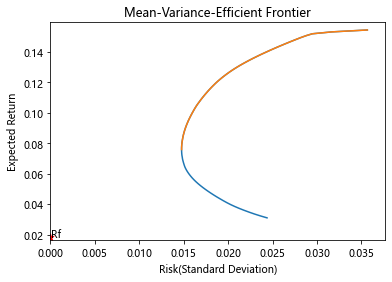

In [6]:
[target_variance, target_returns, PortWts, postive_target_returns, postive_target_variance]=frontcon(ExpReturn, ExpCov , 100)
# 找到满足前沿条件的解（上半直线）
plt.plot(target_variance, target_returns)
plt.plot(postive_target_variance, postive_target_returns)
plt.scatter(0,RF,s=50,marker='*',c='red')
plt.text(0.0001,RF,'Rf')
Min = np.array(target_returns).min()
Max = np.array(target_returns).max()
if RF > Min and RF < Max:
    plt.ylim(Min-0.002,Max+0.005)
elif RF > Max:
    plt.ylim(Min-0.002,RF+0.005)
elif RF < Min:
    plt.ylim(RF-0.002,Max+0.005)
plt.xlim(0,np.array(target_variance).max()+0.002)
plt.title("Mean-Variance-Efficient Frontier")
plt.xlabel("Risk(Standard Deviation)")
plt.ylabel("Expected Return")
plt.show()

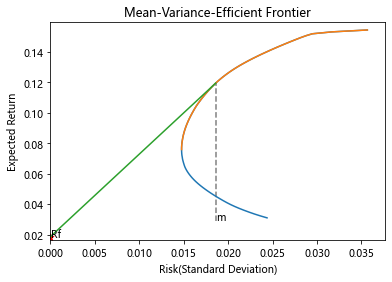

beta系数是0.018608708277027465


In [7]:
# 画证券市场线
[M,E_rm]=Get_M(postive_target_returns,postive_target_variance,RF)
x=[0,postive_target_variance[M]]
y=[RF,postive_target_returns[M]]
plt.plot(target_variance, target_returns)
plt.plot(postive_target_variance, postive_target_returns)
plt.plot(x,y)
plt.vlines(postive_target_variance[M],np.array(target_returns).min()-0.002,postive_target_returns[M],linestyles = "dashed",color='gray')
plt.scatter(0,RF,s=50,marker='*',c='red')
plt.text(0.0001,RF,'Rf')
plt.text(postive_target_variance[M]+0.0001,np.array(target_returns).min()-0.0018,'m')
Min = np.array(target_returns).min()
Max = np.array(target_returns).max()
if RF > Min and RF < Max:
    plt.ylim(Min-0.002,Max+0.005)
elif RF > Max:
    plt.ylim(Min-0.002,RF+0.005)
elif RF < Min:
    plt.ylim(RF-0.002,Max+0.005)
plt.xlim(0,np.array(target_variance).max()+0.002)
plt.title("Mean-Variance-Efficient Frontier")
plt.xlabel("Risk(Standard Deviation)")
plt.ylabel("Expected Return")
plt.show()
m=len(target_returns)-len(postive_target_returns)+M
Beta=beta(sigma_rp(ExpCov,PortWts,m),target_variance[m])
print('beta系数是%s'%Beta)

In [5]:
plan(stock_in_plan,PortWts[m],1000000).perchase_plan()

股票sh600519(贵州茅台)购买0股
股票sh603517(绝味食品)购买2700股
股票sh600031(三一重工)购买2100股
股票sz000858(五 粮 液)购买400股
股票sh603816(顾家家居)购买0股
股票sh600690(海尔智家)购买5700股
股票sh600519(贵州茅台)购买0股
股票sz002493(荣盛石化)购买1600股
股票sh601318(中国平安)购买0股
股票sz000895(双汇发展)购买4200股
股票sz002415(海康威视)购买0股
股票sh601021(春秋航空)购买0股
股票sz000333(美的集团)购买0股
股票sz300413(芒果超媒)购买1500股
股票sz002332(仙琚制药)购买0股
